Model: $X = Z + \epsilon$ where $Z$ and $\epsilon$ are independent unit normal. \
Then $p(x|z) \approx \mathcal{N}(z, 1)$ and $q(z|x) \approx \mathcal{N}(x/2,1/\sqrt{2})$. \
Let's numerically verify this: 
1. Generate $M$ value pairs for $(X,Z)$ where $X=x$ and verify that $Z$ is approximately $\mathcal{N}(x/2,1/\sqrt{2})$
2. Generate $M$ value pairs for $(X,Z)$ where $Z=z$ and verify that $X$ is approximately $\mathcal{N}(z,1)$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
def gen_fixed_z(value, num):
    eps = np.random.normal(0,1, size=num)
    return list(zip(eps +value, [value]*num))

In [3]:
def gen_fixed_x(value, num):
    z_minus_eps = np.random.normal(0,1, size=num) - np.random.normal(0,1, size=num)
    return list(zip([value]*num, z_minus_eps/2 + value/2))

In [4]:
def test_p_x_z():
    value = 2
    num = 1000000
    x_zs = gen_fixed_z(value, num)
    xs = [x for (x,z) in x_zs]
    assert(stats.jarque_bera(xs)[1] > .05)
    plt.hist(xs, bins=1000)

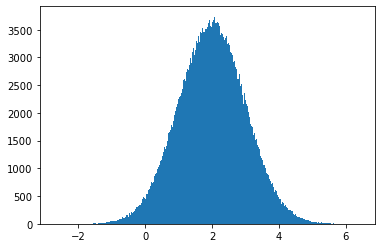

In [5]:
test_p_x_z()

In [6]:
def test_q_z_x():
    value = 2
    num = 1000000
    x_zs = gen_fixed_x(value, num)
    zs = [z for (x,z) in x_zs]
    assert(stats.jarque_bera(zs)[1] >.05)
    plt.hist(zs, bins=1000)

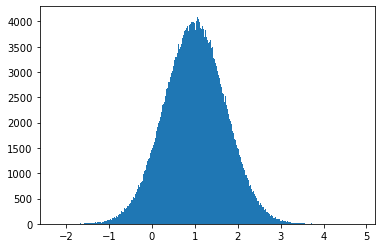

In [7]:
test_q_z_x()

### Evidence lower bound analysis

Consider the following recogition model: \
$ q(Z|X) \sim \mathcal{N}(a_1X + b_1, \sigma_1) \ $ and $\ p(X|Z) \sim \mathcal{N}(a_2Z + b_2, \sigma_2)$ \
and also $Z$ has unit normal prior. Then the evidence lower bound function is

$$\text{elbo}(x,z) = -\frac{1}{2} \, z^{2} + \frac{{\left(a_{1} x + b_{1} - z\right)}^{2}}{2 \, \sigma_{1}^{2}} - \frac{{\left(a_{2} z + b_{2} - x\right)}^{2}}{2 \, \sigma_{2}^{2}} + \log\left(\frac{\sqrt{2}}{2 \, \sqrt{\pi}}\right) - \log\left(\frac{1}{\sigma_{1}}\right) + \log\left(\frac{1}{\sigma_{2}}\right)$$

First we expand:
$$\frac{a_{1}^{2} x^{2}}{2 \, \sigma_{1}^{2}} - \frac{a_{2}^{2} z^{2}}{2 \, \sigma_{2}^{2}} - \frac{1}{2} \, z^{2} + \frac{a_{1} b_{1} x}{\sigma_{1}^{2}} - \frac{a_{2} b_{2} z}{\sigma_{2}^{2}} - \frac{a_{1} x z}{\sigma_{1}^{2}} + \frac{a_{2} x z}{\sigma_{2}^{2}} + \frac{b_{1}^{2}}{2 \, \sigma_{1}^{2}} - \frac{b_{2}^{2}}{2 \, \sigma_{2}^{2}} + \frac{b_{2} x}{\sigma_{2}^{2}} - \frac{x^{2}}{2 \, \sigma_{2}^{2}} - \frac{b_{1} z}{\sigma_{1}^{2}} + \frac{z^{2}}{2 \, \sigma_{1}^{2}} + \\ \log\left(\frac{\sqrt{2}}{2 \, \sqrt{\pi}}\right) - \log\left(\frac{1}{\sigma_{1}}\right) + \log\left(\frac{1}{\sigma_{2}}\right)$$

and then integrating over $z \sim \mathcal{N}(a_1x + b_1, \sigma_1)$, with $Ez = a_1x + b_1$ amd $Ez^2 = (a_1x+b_1)^2 + \sigma_1^2$


$$\newcommand{\Bold}[1]{\mathbf{#1}}-\frac{1}{2} \, a_{1}^{2} x^{2} - \frac{a_{1}^{2} a_{2}^{2} x^{2}}{2 \, \sigma_{2}^{2}} - a_{1} b_{1} x - \frac{a_{1} a_{2}^{2} b_{1} x}{\sigma_{2}^{2}} - \frac{1}{2} \, b_{1}^{2} - \frac{1}{2} \, \sigma_{1}^{2} - \frac{a_{2}^{2} b_{1}^{2}}{2 \, \sigma_{2}^{2}} - \frac{a_{2}^{2} \sigma_{1}^{2}}{2 \, \sigma_{2}^{2}} - \frac{a_{1} a_{2} b_{2} x}{\sigma_{2}^{2}} + \frac{a_{1} a_{2} x^{2}}{\sigma_{2}^{2}} - \frac{a_{2} b_{1} b_{2}}{\sigma_{2}^{2}} + \frac{a_{2} b_{1} x}{\sigma_{2}^{2}} - \frac{b_{2}^{2}}{2 \, \sigma_{2}^{2}} + \frac{b_{2} x}{\sigma_{2}^{2}} - \frac{x^{2}}{2 \, \sigma_{2}^{2}} + \log\left(\sigma_{1}\right) - \log\left(\sigma_{2}\right) + \log\left(\frac{\sqrt{2}}{2 \, \sqrt{\pi}}\right) + \frac{1}{2}$$

Now we integrate over $x \sim \mathcal{N}(0,2)$, with $Ex = 0\ $ and $\ Ex^2 = 2$ to get:
$$F = \newcommand{\Bold}[1]{\mathbf{#1}}-a_{1}^{2} - \frac{1}{2} \, b_{1}^{2} - \frac{1}{2} \, \sigma_{1}^{2} - \frac{a_{1}^{2} a_{2}^{2}}{\sigma_{2}^{2}} - \frac{a_{2}^{2} b_{1}^{2}}{2 \, \sigma_{2}^{2}} - \frac{a_{2}^{2} \sigma_{1}^{2}}{2 \, \sigma_{2}^{2}} - \frac{a_{2} b_{1} b_{2}}{\sigma_{2}^{2}} + \frac{2 \, a_{1} a_{2}}{\sigma_{2}^{2}} - \frac{b_{2}^{2}}{2 \, \sigma_{2}^{2}} - \frac{1}{\sigma_{2}^{2}} + \log\left(\sigma_{1}\right) - \log\left(\sigma_{2}\right) + \log\left(\frac{\sqrt{2}}{2 \, \sqrt{\pi}}\right) + \frac{1}{2}
$$


The following are the partial derivatives:
\begin{eqnarray*}
\frac{\partial{F}}{\partial{a_1}} &=& -2 \, a_{1} - \frac{2 \, a_{1} a_{2}^{2}}{\sigma_{2}^{2}} + \frac{2 \, a_{2}}{\sigma_{2}^{2}} \\
\frac{\partial{F}}{\partial{a_2}} &=& -\frac{2 \, a_{1}^{2} a_{2}}{\sigma_{2}^{2}} - \frac{a_{2} b_{1}^{2}}{\sigma_{2}^{2}} - \frac{a_{2} \sigma_{1}^{2}}{\sigma_{2}^{2}} - \frac{b_{1} b_{2}}{\sigma_{2}^{2}} + \frac{2 \, a_{1}}{\sigma_{2}^{2}} \\
\frac{\partial{F}}{\partial{b_1}} &=& \newcommand{\Bold}[1]{\mathbf{#1}}-\frac{2 \, a_{1}^{2} b_{1}}{\sigma_{2}^{2}} - \frac{a_{2}^{2} b_{1}}{\sigma_{2}^{2}} - \frac{b_{1} \sigma_{1}^{2}}{\sigma_{2}^{2}} - \frac{a_{2} b_{2}}{\sigma_{2}^{2}} + \frac{2 \, a_{1}}{\sigma_{2}^{2}}\\
\frac{\partial{F}}{\partial{b_2}} &=& \newcommand{\Bold}[1]{\mathbf{#1}}-\frac{a_{2} b_{1}}{\sigma_{2}^{2}} - \frac{b_{2}}{\sigma_{2}^{2}} \\
\frac{\partial{F}}{\partial{\sigma_1}} &=& \newcommand{\Bold}[1]{\mathbf{#1}}-\sigma_{1} - \frac{b_{1}^{2} \sigma_{1}}{\sigma_{2}^{2}} + \frac{1}{\sigma_{1}} \\
\frac{\partial{F}}{\partial{\sigma_2}} &=& \newcommand{\Bold}[1]{\mathbf{#1}}\frac{2 \, a_{1}^{2} b_{1}^{2}}{\sigma_{2}^{3}} + \frac{a_{2}^{2} b_{1}^{2}}{\sigma_{2}^{3}} + \frac{b_{1}^{2} \sigma_{1}^{2}}{\sigma_{2}^{3}} + \frac{2 \, a_{2} b_{1} b_{2}}{\sigma_{2}^{3}} - \frac{4 \, a_{1} b_{1}}{\sigma_{2}^{3}} + \frac{b_{2}^{2}}{\sigma_{2}^{3}} - \frac{1}{\sigma_{2}} + \frac{2}{\sigma_{2}^{3}}
\end{eqnarray*}

We can see that $a_1 = 1/2, a_2 = 1, b1 = b2 = 0, \sigma_1 = 1/\sqrt{2}, \sigma_2 = 1$ is a stationary point

Now we will run tensorflow to see if it can discover this point by maximizing $F$.

In [143]:
import tensorflow as tf

In [164]:
def loss(a1,a2,b1,b2,sigma1,sigma2):
    return -a1**2 - 1/2*b1**2 - 1/2*sigma1**2 - a1**2*a2**2/sigma2**2 - 1/2*a2**2*b1**2/sigma2**2 - 1/2*a2**2*sigma1**2/sigma2**2 - a2*b1*b2/sigma2**2 + 2*a1*a2/sigma2**2 - 1/2*b2**2/sigma2**2 - 1/sigma2**2 + tf.math.log(sigma1) - tf.math.log(sigma2) + tf.math.log(1/2*tf.sqrt(2.0)/tf.sqrt(np.pi)) + 1/2

In [165]:
a1 = tf.Variable(1.0)
b1 = tf.Variable(1.0)
a2 = tf.Variable(1.0)
b2 = tf.Variable(1.0)
sigma1 = tf.Variable(1.0)
sigma2 = tf.Variable(1.0)
epochs = 10000
optimizer = tf.keras.optimizers.Adamax()
learning_rate = 0.1
for epoch in range(epochs):
    with tf.GradientTape() as t:
        t.watch([a1, a2, b1, b2, sigma1, sigma2])
        F = loss(a1,a2,b1,b2,sigma1,sigma2)
        da1, da2, db1, db2, dsigma1, dsigma2 = t.gradient(F, [a1, a2, b1, b2, sigma1, sigma2])
        a1.assign_add(learning_rate*da1)
        a2.assign_add(learning_rate*da2)
        b1.assign_add(learning_rate*db1)
        b2.assign_add(learning_rate*db2)
        sigma1.assign_add(learning_rate*dsigma1)
        sigma2.assign_add(learning_rate*dsigma2)
        if epoch % 1000 == 0:
            print([x.numpy() for x in [a1,a2,b1,b2,sigma1,sigma2,F]])
        

[0.8, 0.7, 0.7, 0.8, 0.9, 1.4, -4.9189386]
[0.26774672, 0.53549397, -2.9368648e-21, 6.7602745e-21, 0.9255394, 1.308911, -1.7655122]
[0.26774672, 0.53549397, -3.6871e-41, 8.4872e-41, 0.9255394, 1.308911, -1.7655122]
[0.26774672, 0.53549397, -8e-45, 1.5e-44, 0.9255394, 1.308911, -1.7655122]
[0.26774672, 0.53549397, -8e-45, 1.5e-44, 0.9255394, 1.308911, -1.7655122]
[0.26774672, 0.53549397, -8e-45, 1.5e-44, 0.9255394, 1.308911, -1.7655122]
[0.26774672, 0.53549397, -8e-45, 1.5e-44, 0.9255394, 1.308911, -1.7655122]
[0.26774672, 0.53549397, -8e-45, 1.5e-44, 0.9255394, 1.308911, -1.7655122]
[0.26774672, 0.53549397, -8e-45, 1.5e-44, 0.9255394, 1.308911, -1.7655122]
[0.26774672, 0.53549397, -8e-45, 1.5e-44, 0.9255394, 1.308911, -1.7655122]


In [133]:
tf.keras.backend.set_floatx('float32')
print(loss(0.5,1.0,0.0,0.0,1/tf.sqrt(2.0),1.0))

tf.Tensor(-1.7655122, shape=(), dtype=float32)


There are many optimal solutions and the analytical solution above is one of them.\
However, the model actually imposes more constraints on the parameters than we have used.\
We can see that
\begin{eqnarray*}
EX &=& E_Z(a_2Z+b_2) = b_2 \\
EX^2 &=& E_Z(a_2Z^2+b_2) =  \sigma_2^2 + a_2^2 + b_2^2 \\
EZ^2 &=& E_X(EZ^2|X) = E_X(a_1X + b_1X)^2 + \sigma_2^2 \\
&=& a_1^2EX^2  + 2a_1b1EX + b_1^2 + \sigma_1^2 \\
&=& a_1^2(\sigma_2^2 + a_2^2 + b_2^2) + 2a_1b_1b_2 + b_1^2 + \sigma_1^2 = 1
\end{eqnarray*}

Now we will replace $\sigma_1^2$ by $1 - a_1^2(\sigma_2^2 + a_2^2 + b_2^2) - 2a_1b_1b_2 - b_1^2$ and try the optimization again.

In [184]:
def get_sigma1(a1,a2,b1,b2,sigma2):
    return tf.sqrt(1.0 - a1**2*(sigma2**2 + a2**2 + b2**2) - 2*a1*b1*b2 - b1**2)

In [186]:
def loss2(a1,a2,b1,b2,sigma2):
    sigma1 = get_sigma1(a1,a2,b1,b2,sigma2)
    return loss(a1,a2,b1,b2,sigma1,sigma2)

In [187]:
def constraint(a1,a2,b1,b2,sigma1,sigma2):
    return a1**2*(sigma2**2 + a2**2 + b2**2) + 2*a1*b1*b2 + b1**2 + sigma1**2

In [188]:
a1 = tf.Variable(0.1)
b1 = tf.Variable(0.1)
a2 = tf.Variable(0.1)
b2 = tf.Variable(0.1)
sigma2 = tf.Variable(1.0)
epochs = 1000
optimizer = tf.keras.optimizers.Adamax()
learning_rate = 0.1
for epoch in range(epochs):
    with tf.GradientTape() as t:
        t.watch([a1, a2, b1, b2, sigma2])
        F = loss2(a1,a2,b1,b2,sigma2)
        da1, da2, db1, db2, dsigma2 = t.gradient(F, [a1, a2, b1, b2, sigma2])
        a1.assign_add(learning_rate*da1)
        a2.assign_add(learning_rate*da2)
        b1.assign_add(learning_rate*db1)
        b2.assign_add(learning_rate*db2)
        sigma2.assign_add(learning_rate*dsigma2)
        if epoch % 100 == 0:
            sigma1 = get_sigma1(a1,a2,b1,b2,sigma2)
            print([x.numpy() for x in [a1,a2,b1,b2,sigma1, sigma2,F]])

[0.099657714, 0.10892073, 0.08876026, 0.088986024, 0.9891274, 1.0981951, -1.9251027]
[0.07588988, 0.15177853, -5.249129e-05, 0.00036689814, 0.9942241, 1.4060409, -1.7655122]
[0.07588961, 0.15177909, -3.4159007e-07, 2.3015466e-06, 0.9942241, 1.4060446, -1.7655122]
[0.07588961, 0.15177909, -2.1447066e-09, 1.444878e-08, 0.9942241, 1.4060446, -1.7655122]
[0.07588961, 0.15177909, -1.3464203e-11, 9.070763e-11, 0.9942241, 1.4060446, -1.7655122]
[0.07588961, 0.15177909, -8.452661e-14, 5.6945133e-13, 0.9942241, 1.4060446, -1.7655122]
[0.07588961, 0.15177909, -5.306476e-16, 3.574945e-15, 0.9942241, 1.4060446, -1.7655122]
[0.07588961, 0.15177909, -3.3313396e-18, 2.244306e-17, 0.9942241, 1.4060446, -1.7655122]
[0.07588961, 0.15177909, -2.091373e-20, 1.408947e-19, 0.9942241, 1.4060446, -1.7655122]
[0.07588961, 0.15177909, -1.3129378e-22, 8.845191e-22, 0.9942241, 1.4060446, -1.7655122]


We still couldn't get the desired solution. More constraints are needed.

In [225]:
def elbo(x,z, a1, a2, b1, b2, sigma1, sigma2):
    return (-z**2/2 + (a1*x + b1 -z)**2/2/sigma1**2 - (a2**z + b2 -x)**2/2/sigma2**2
            + np.log(1/(np.sqrt(2*np.pi))) + np.log(sigma1) - np.log(sigma2) )

def elbo_x(x, a1, a2, b1, b2, sigma1, sigma2):
    return (-1/2*a1**2*x**2 - a1**2*a2**2*x**2/2/sigma2**2 - a1*b1*x
            -a1*a2**2*b1*x/sigma2**2 - b1**2/2 - sigma1**2/2 - a2**2*b1**2/2/sigma2**2
            -a2**2*sigma1**2/2/sigma2**2 - a1*a2*b2*x/sigma2**2 + a1*a2*x*2/sigma2**2
            -a2*b1*b2/sigma2**2 + a2*b1*x/sigma2**2 -b2**2/2/sigma2**2 + b2*x/sigma2**2
            -x**2/2/sigma2**2 + np.log(sigma1) - np.log(sigma2) - np.log(np.sqrt(2*np.pi)) + 1/2)

In [222]:
a1, a2, b1, b2, sigma1, sigma2 = 1/2, 1.0, 0.0, 0.0, 1/np.sqrt(2.0), 1.0

In [229]:
N = 10000000
zs = np.random.normal(0,1, N)
xs = zs + np.random.normal(0,1, N)
res_x = elbo_x(xs, a1, a2, b1, b2, sigma1, sigma2)
res = elbo(xs, zs, a1, a2, b1, b2, sigma1, sigma2)
np.mean(res), np.mean(res_x)

(-2.765497818910794, -2.7656068242024814)